# Issue 7 : Model Selection and Feature Selection

## **Task Overview**
- Train multiple classification models:
  - **Logistic Regression**
  - **Random Forest**
  - **XGBoost**
- Perform **feature selection & engineering**.
- Evaluate models using **Cross-Validation (CV)**.
- Compare models based on:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1-Score**
- Use **visualizations** for performance comparison.

# Importing Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [45]:
data = pd.read_csv("encoded-in-vehicle-coupon-recommendation.csv")

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12610 non-null  int64
 1   passanger             12610 non-null  int64
 2   weather               12610 non-null  int64
 3   temperature           12610 non-null  int64
 4   time                  12610 non-null  int64
 5   coupon                12610 non-null  int64
 6   expiration            12610 non-null  int64
 7   gender                12610 non-null  int64
 8   age                   12610 non-null  int64
 9   maritalStatus         12610 non-null  int64
 10  has_children          12610 non-null  int64
 11  education             12610 non-null  int64
 12  occupation            12610 non-null  int64
 13  income                12610 non-null  int64
 14  Bar                   12610 non-null  int64
 15  CoffeeHouse           12610 non-null  int64
 16  Carr

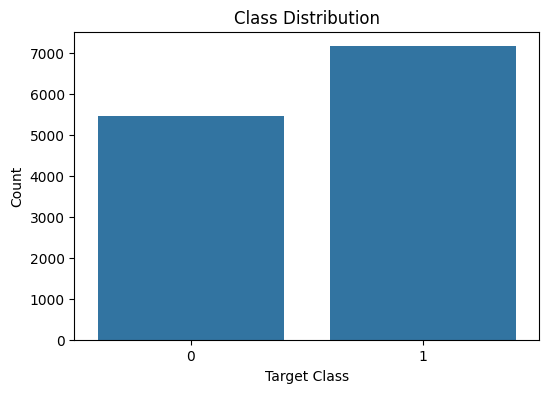

In [47]:
# Checking Target Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=data["Y"])
plt.title("Class Distribution")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

In [48]:
# Dividing Dependent and Independent variables
X = data.drop("Y", axis=1)
y = data["Y"]

In [49]:
# Selecting Top 10 Important Features
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X, y)

In [50]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
# Applying SMOTE to handle imbalance dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

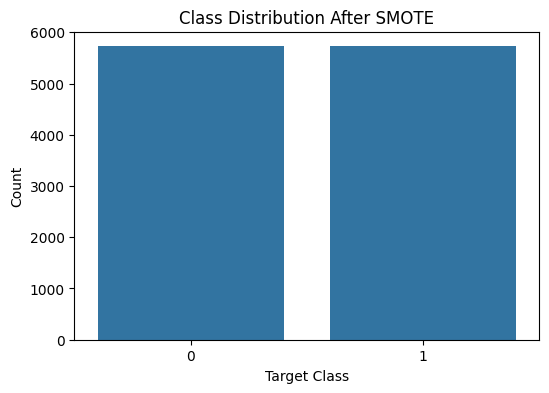

In [52]:
# Check class distribution after SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

In [53]:
# Standardize features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [57]:
# Defining Models to be used for Cross validation
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier()
}

In [58]:
# Define scoring metrics
scoring_metrics = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score)
}

In [59]:
# Train & evaluate each model using Cross-Validation (5 folds)
results = []
for name, model in models.items():
  model_results_after = {}
  print(f"{model}")
  for metric, scorer in scoring_metrics.items():
          scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring=scorer)
          mean_score = np.mean(scores)
          model_results_after[metric] = mean_score
          print(f"{metric.capitalize()}: {mean_score:.4f}")
  results.append([name, model_results_after["accuracy"], model_results_after["precision"], model_results_after["recall"], model_results_after["f1"]])
  print()

LogisticRegression()
Accuracy: 0.6038
Precision: 0.6044
Recall: 0.6016
F1: 0.6030

RandomForestClassifier()
Accuracy: 0.6978
Precision: 0.7002
Recall: 0.6933
F1: 0.7003

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 0.7153
Precision: 0.7129
Recall: 0.7253
F1: 0.7183

KNeighbors

In [60]:
# Converting results to DataFrame
new_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

<Figure size 1000x600 with 0 Axes>

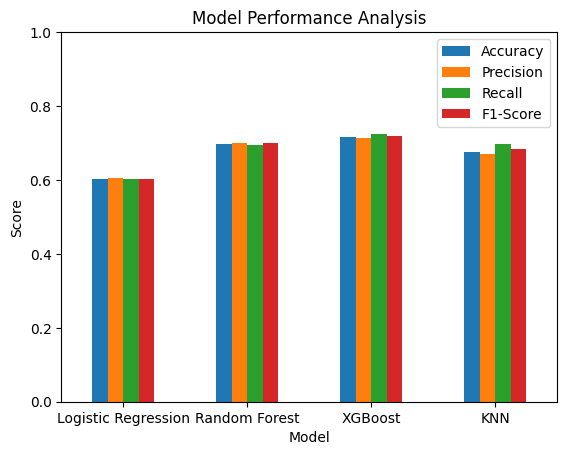

In [61]:
# Plot results
plt.figure(figsize=(10, 6))
new_df.set_index("Model").plot(kind="bar")
plt.title("Model Performance Analysis")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

# Analysis

1. Best Performing Model: XGBoost performs best than other models with accuracy (71.53%), precision (71.29%), recall (72.53%), and F1-score (71.83%), indicating it is the best model for this classification task.
2. You can use Random Forest Classifier instead of XGBoost if it is computationally expensive.
3. KNN and Logistic Regression are not ideal for this task.